### Imports

In [58]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, ensemble, neighbors
import graphviz
import pydotplus


### Spotify authorization

In [11]:
sb.set()

sp = spotipy.Spotify()
        
cid = "34f843c5f22c4242a2647ec4651ba2ce"
csec = "0826e491d90f4e43bbaec2fee7534610"


client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=csec)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

user_id = "1279914484"

## Data collection & processing

### What data do we want?


### Defining necessary functions


In [12]:
attributes = ["danceability","energy", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo"]

def df_from_playlist(uri,song_type=None, user=user_id):
    p1 = sp.user_playlist(user=user, playlist_id=uri)

    p1_dict = {"name":[], "uri":[], "artists":[]}
    
    if song_type:
        p1_dict['type'] = []

    for song in p1['tracks']['items']:
        name = song['track']['name']
        uri = song['track']['uri'].split(":")[2]
        a = song['track']['artists']
        artists = []
        for ar in a:
            artists.append(ar['name'])
        anal = sp.audio_features(uri)[0]

        wanted_keys = ["danceability","energy", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo"]
        sub = dict((k, anal[k]) for k in wanted_keys if k in anal)

        p1_dict['name'] += [name]
        p1_dict['uri'] +=  [uri]
        p1_dict['artists'] +=  [str(artists)[1:-1]]
        if song_type:
            p1_dict['type'] += [song_type]

        for k in wanted_keys:
            if k in p1_dict:
                p1_dict[k] += [sub[k]]
            else:
                p1_dict[k] = [sub[k]]
    return pd.DataFrame.from_dict(p1_dict)

def df_from_uri(uri_list, song_type):
    s_dict = {'name':[], 'type': [], 'uri': []}
    for uri in uri_list:
        name = sp.track(uri)['name']
        anal = sp.audio_features(uri)[0]

        wanted_keys = ["danceability","energy", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo"]
        sub = dict((k, anal[k]) for k in wanted_keys if k in anal)

        s_dict['name'] += [name]
        s_dict['uri'] +=  [uri]
        s_dict['type'] += [song_type]
        for k in wanted_keys:
            if k in s_dict:
                s_dict[k] += [sub[k]]
            else:
                s_dict[k] = [sub[k]]
    return pd.DataFrame.from_dict(s_dict)
      

In [13]:
# Come & See Me, Love n Hennessy, Neighbors, A Place Like This
chill_uris = ['1wZqJM5FGDEl3FjHDxDyQd','57zEbGuOa9Skogmm0WdOzM','0utlOiJy2weVl9WTkcEWHy','1jRHh8JcdUV9zTiAmyzhU9']

# Shot Down, Fly Away, Save Me, Same Drugs
sad_uris = ['58nciIyr5vKpUJkUXXkxCq','0f1odHdnTJyxrLI4nWfSs6','2UwbhMie1EAYuTZ0QXeMwl','6m9qPYXmhge2QhBLfFKnVF']

# Look At Me!, New Level, Old English, Check
gym_uris = ["7floNISpH8VF4z4459Qo18", "11BIoKDpTJHX5mZt6p566h", "56X1fzloIoGKKOgpLLIGoe", "5vZDl7Jr6GmtJjnziKSBqN"]

# Motorsport, Pills & Automobiles, Unforgettable, Nice For What
party_uris = ["4wFjTWCunQFKtukqrNijEt", "4YkwUfWSIxdKNLDXw0caFO", "3B54sVLJ402zGa6Xm4YGNe", "3CA9pLiwRIGtUBiMjbZmRw"]
    
party = df_from_uri(party_uris, "Party")
chill = df_from_uri(chill_uris, "Chill")
sad = df_from_uri(sad_uris, "Sad")
gym = df_from_uri(gym_uris, "Gym")

all_lists = pd.concat([party, chill, sad, gym])
display(all_lists)


,name,type,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,MotorSport,Party,4wFjTWCunQFKtukqrNijEt,0.896,0.515,-5.395,0.1830,0.033800,0.000000,0.1740,138.016
1,Pills & Automobiles,Party,4YkwUfWSIxdKNLDXw0caFO,0.820,0.696,-4.918,0.1820,0.119000,0.000000,0.6170,144.981
2,Unforgettable,Party,3B54sVLJ402zGa6Xm4YGNe,0.726,0.769,-5.043,0.1230,0.029300,0.010100,0.7330,97.985
3,Nice For What,Party,3CA9pLiwRIGtUBiMjbZmRw,0.586,0.909,-6.474,0.0705,0.089100,0.000109,0.7570,93.394
0,Come and See Me (feat. Drake),Chill,1wZqJM5FGDEl3FjHDxDyQd,0.717,0.347,-10.265,0.0636,0.051100,0.000002,0.0589,84.987
1,Love N Hennessy,Chill,57zEbGuOa9Skogmm0WdOzM,0.931,0.306,-9.979,0.4530,0.012800,0.000009,0.4570,140.039
2,Neighbors,Chill,0utlOiJy2weVl9WTkcEWHy,0.894,0.284,-13.002,0.3300,0.358000,0.000487,0.4130,138.944
3,A Place Like This,Chill,1jRHh8JcdUV9zTiAmyzhU9,0.551,0.449,-11.297,0.0637,0.044200,0.006810,0.3920,133.558
0,Shot Down,Sad,58nciIyr5vKpUJkUXXkxCq,0.769,0.511,-6.673,0.0609,0.885000,0.000186,0.5070,123.954
1,Fly Away,Sad,0f1odHdnTJyxrLI4nWfSs6,0.707,0.256,-13.872,0.0397,0.039900,0.156000,0.0652,89.990


<Figure size 5040x5040 with 0 Axes>

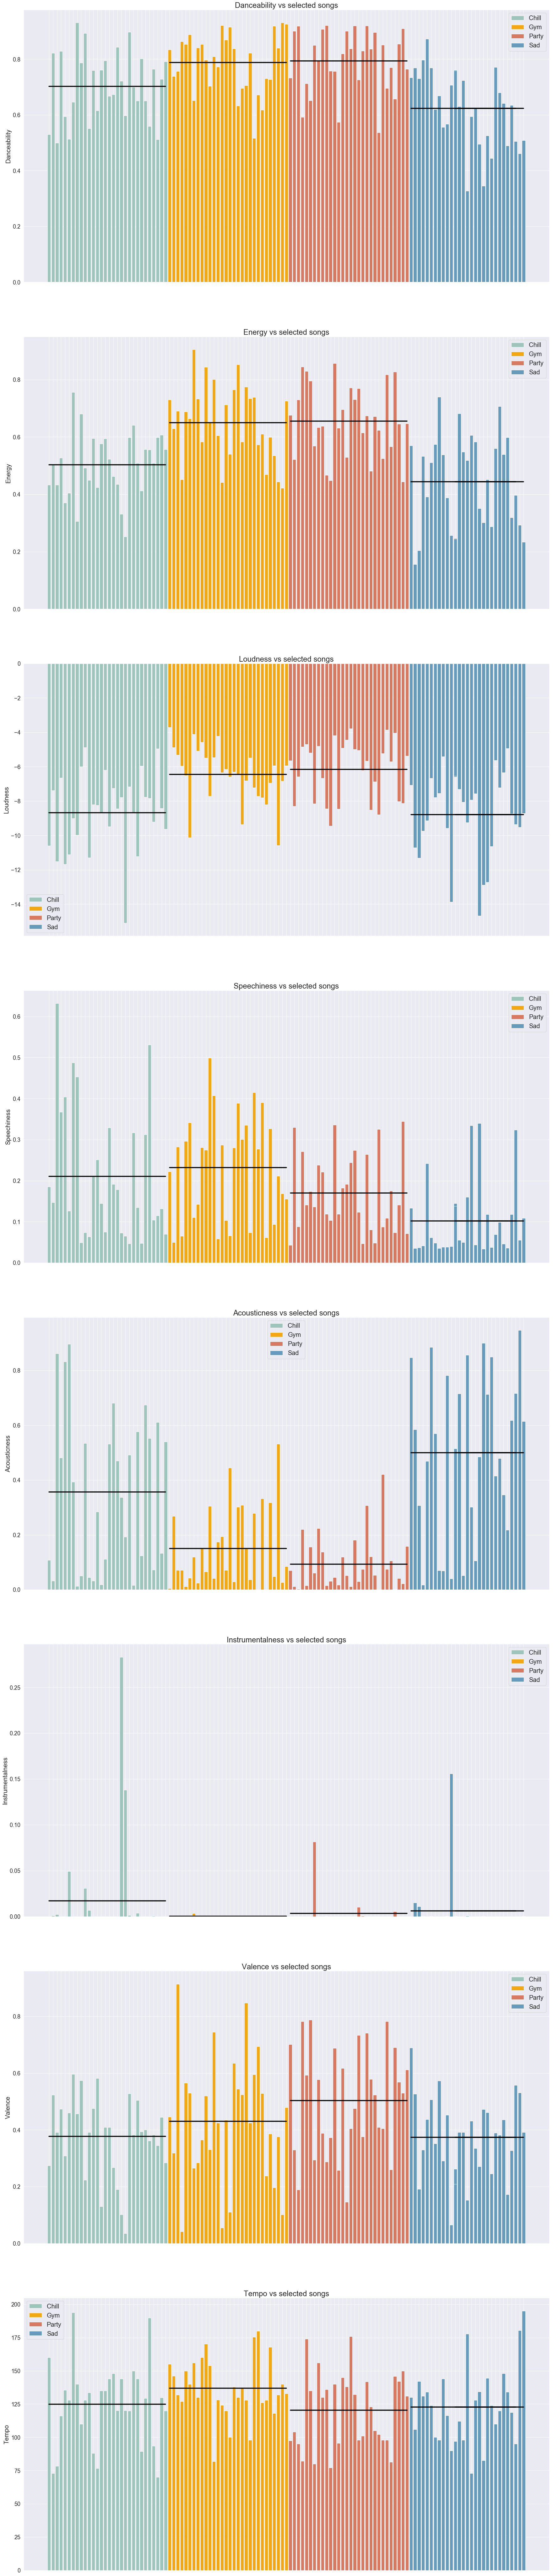

In [76]:
plt.figure(figsize=(70,70))
#a = (a1,a2,a3,a4,a5,a6,a7,a8)
f,a = plt.subplots(len(attributes),1,figsize=(30,150))
colors = {'Chill':'#9DC5BB', 'Gym':'#F3A712', 'Party':'#D77A61', 'Sad':'#669BBC'}


sad_training = df_from_playlist('7GIMKQrjyYXlzkCnS99bzp',song_type='Sad',user='1279914484')
gym_training = df_from_playlist('6jEXwWSWPaGp3PaaEFVZg2',song_type='Gym',user='1279914484')
chill_training = df_from_playlist('7k4Y4X1BLH6vogZPQvXkd3',song_type='Chill',user='1279914484')
party_training = df_from_playlist('0FvUNf05XwDGmStECPUcjd',song_type='Party',user='1279914484')

training = pd.concat([sad_training,chill_training,party_training,gym_training])


i = 0
for ax in a:
    for key,df in training.groupby('type'):
        ax.bar(x=df['name'], height=df[attributes[i]], label=key, color=colors[key])
        
        mean = df[attributes[i]].mean()
        y = [mean for _ in range(len(df['name']))]
        ax.plot(df['name'], y, color='#000000', linewidth=3.5)
        
        ax.legend(fontsize=20)
        ax.set_title(attributes[i].capitalize() + ' vs selected songs', fontsize=24)
        ax.set_ylabel(attributes[i].capitalize(), fontsize=20)
        ax.set_xticklabels([])
        #for tick in ax.get_xticklabels():
            #tick.set_rotation(45)
            #tick.set_fontsize(18)
        for tick in ax.get_yticklabels():
            tick.set_fontsize(18)
        
    

    i+=1



plt.show()

## [Analysis of graphs]

## ML


In [81]:
features = ['speechiness', 'energy', 'loudness', 'acousticness']
classes = ['Gym', 'Chill', 'Sad', 'Party']

#display(training)
def get_ftr_array(uri):
    name = sp.track(uri)['name']
    anal = sp.audio_features(uri)[0]
    return np.array([anal[x] for x in features])


X = []
Y = []
test = df_from_playlist('3r4QivLAUexk9cqnI1zV2n',user='rayshruti')

#display(training)
for key, row in training.iterrows():
        X.append(row[features].values)
        Y.append(row['type'])

        
# Decision tree        
dt = tree.DecisionTreeClassifier()
dt.fit(X,Y)

# Random forests
#rf = ensemble.RandomForestClassifier(n_estimators=4)
#rf.fit(X,Y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:

expected = ['Party', 'Party', 'Party', 'Party', 'Party', 'Party', 'Gym', 'Sad', 'Gym', 'Gym', 'Chill', 'Gym', 'Sad', 'Sad', 'Sad', 'Gym', 'Chill', 'Party', 'Party', 'Gym', 'Party', 'Chill', 'Chill', 'Party', 'Chill', 'Party', 'Chill', 'Party', 'Gym', 'Party', 'Party', 'Chill']
test['expected'] = expected

for key,row in test.iterrows():
    f = get_ftr_array(row['uri']).reshape(1, len(features))
    test.at[key,'decision_tree'] = dt.predict(f)[0]
    #test.at[key, 'random_forest'] = rf.predict(f)[0]
    
def color_categories(val):
    if val == 'Party' or val == 'Sad' or val == 'Chill' or val == 'Gym': 
        color = colors[val]
    else: color = ''
    
    return 'background-color: %s' % color
    
df = test[['name', 'artists', 'decision_tree', 'expected']]
s = df.style.applymap(color_categories)
s


,name,artists,decision_tree,expected
0,Bodak Yellow,'Cardi B',Party,Party
1,HUMBLE.,'Kendrick Lamar',Party,Party
2,The Motto,"'Drake', 'Lil Wayne'",Party,Party
3,HYFR (Hell Ya Fucking Right),"'Drake', 'Lil Wayne'",Party,Party
4,Calm Down,'G-Eazy',Party,Party
5,Bad Company,"'A$AP Rocky', 'BlocBoy JB'",Sad,Party
6,RAF,"'A$AP Mob', 'A$AP Rocky', 'Playboi Carti', 'Quavo', 'Lil Uzi Vert', 'Frank Ocean'",Gym,Gym
7,Marvins Room,'Drake',Sad,Sad
8,Gunz N Butter,"'A$AP Rocky', 'Juicy J'",Chill,Gym
9,Angels,'A$AP Rocky',Party,Gym


In [71]:
t = tree.export_graphviz(dt, feature_names=features, class_names=classes, out_file=None)

graph=graphviz.Source(t)
graph

graph.render('tree', view=True)  

'tree.pdf'